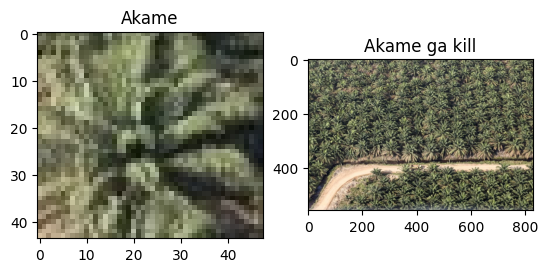

In [17]:
import cv2
# tampilkan kedua gambar
from matplotlib import pyplot as plt

# panggil dan konversi warna agar sesuai dengan Matplotlib
sawit = cv2.imread('sawit.jpg')
sawit = cv2.cvtColor(sawit, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
kebun_sawit = cv2.imread('kebun.jpg')
kebun_sawit = cv2.cvtColor(kebun_sawit, cv2.COLOR_BGR2RGB) 
plt.subplot(121),plt.imshow(sawit), plt.title('Akame')
plt.subplot(122),plt.imshow(kebun_sawit), plt.title('Akame ga kill')
plt.show()


In [19]:
import cv2
import numpy as np

# Membaca gambar utuh untuk dicari
img_rgb = cv2.imread('kebun.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Membaca template
template = cv2.imread('sawit.jpg', 0)

# Ukuran template. Ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# Menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik. 
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15

# Menemukan lokasi-lokasi hasil deteksi
loc = np.where(res >= threshold)

# Membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint = []
lspoint2 = []
count = 0 # Untuk menyimpan jumlah matching yang ditemukan

for pt in zip(*loc[::-1]):
    # Jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        # Gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
        
        for i in range(pt[0] - 9, pt[0] + 9, 1):
            # Tambahkan koordinat x ke list
            lspoint.append(i)
        
        for k in range(pt[1] - 9, pt[1] + 9, 1):
            # Tambahkan koordinat y ke list
            lspoint2.append(k)
        
        count += 1 # Berapa jumlah matching yang ditemukan?
    else:
        continue

print("Jumlah objek ditemukan:", count)

# Tampilkan dengan imshow
cv2.imshow("Deteksi Objek", img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


Jumlah objek ditemukan: 55
